##  Multi-layers Perceptron for handwritten digits recognition

Charger les dépendances et les modules requis pour la suite du script

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plot
import cv2

Charger la dataset MNIST: http://yann.lecun.com/exdb/mnist/

In [2]:
mnist_train_images=np.fromfile("dataset/mnist/train-images.idx3-ubyte", dtype=np.uint8)[16:].reshape(-1, 784)/255
mnist_train_labels=np.eye(10)[np.fromfile("dataset/mnist/train-labels.idx1-ubyte", dtype=np.uint8)[8:]]
mnist_test_images=np.fromfile("dataset/mnist/t10k-images.idx3-ubyte", dtype=np.uint8)[16:].reshape(-1, 784)/255
mnist_test_labels=np.eye(10)[np.fromfile("dataset/mnist/t10k-labels.idx1-ubyte", dtype=np.uint8)[8:]]

Ici nous commençons à appeler les méthodes de la classe tensorflow.
Ces deux placeholders représentent les endroits où seront placés l'image d'entrée (l'image du chiffre manuscrit) et le résultat du réseau (le chiffre prédit par le réseau).

In [3]:
ph_images=tf.placeholder(shape=(None, 784), dtype=tf.float32)
ph_labels=tf.placeholder(shape=(None, 10), dtype=tf.float32)

Les paramètres d'apprentissage sont le nombre de neurones par couche (nbr_ni), le learning_rate, la taille du batch d'apprentissage (taille_batch) et le nombre d'itération d'apprentissage (nbre_entrainement).

In [4]:
nbr_ni=100
learning_rate=0.0001
taille_batch=100
nbr_entrainement=200

Ensuite nous définissons les différents poids du réseau wci, les différents biais bci avec la mtéthode ```tf.Variable()```.
Les valeurs initiales des wci sont initialisées de manière aléatoire selon une loi normale tronquée ```tf.truncated_normal()```. Attention, lorsque la méthode ```tf.truncated_normal()``` n'est pas disponible, vous utiliserez la méthode ```tf.normal()```.
Les valeurs initiales des bci sont initialisées à 0 avec la méthode ```np.zeros()```.

In [5]:
wci=tf.Variable(tf.truncated_normal(shape=(784, nbr_ni)), dtype=tf.float32)
bci=tf.Variable(np.zeros(shape=(nbr_ni)), dtype=tf.float32)

sci est d'abord le résultat de la somme pondrée des entrées.
Ce résultat passe ensuite dans la fonction d'activation (ici sigmoid).

In [6]:
sci=tf.matmul(ph_images, wci)+bci
sci=tf.nn.sigmoid(sci)

Identiquement pour les poids et les biais de sortie.

In [7]:
wcs=tf.Variable(tf.truncated_normal(shape=(nbr_ni, 10)), dtype=tf.float32)
bcs=tf.Variable(np.zeros(shape=(10)), dtype=tf.float32)
scs=tf.matmul(sci, wcs)+bcs
scso=tf.nn.softmax(scs)

Pour la phase d'apprentissage, nous devons définir une fonction de perte à optimiser (loss) et la méthode d'optimisation à utiliser (GradientDescentOptimizer). La fonction de loss est définie comme la crosse entropie. D'autres méthodes d'optimisation sont disponibles et vous pourrez les tester( AdamOptimizer par exemple).

In [8]:
loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=ph_labels, logits=scs)
train=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(scso, 1), tf.argmax(ph_labels, 1)), dtype=tf.float32))

```ft.Session()``` démarre la session qui est appelé s. 
Cette session regroupe les différentes itérations d'apprentissage et les prédictions sur la base de test.
 Il est important de noter que, puisque python se sert de l'indentation pour "regrouper" certaines actions sous une même boucle par exemple, il faudra veiller à ce que ```s.run()``` soit à un niveau supérieur au niveau d'indentation de ```tf.Session()``` afin que la session s ne soit pas close.

In [9]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())

    tab_acc_train=[]
    tab_acc_test=[]
    for id_entrainement in range(nbr_entrainement):
        print("ID entrainement", id_entrainement)
        for batch in range(0, len(mnist_train_images), taille_batch):
            s.run(train, feed_dict={
                ph_images: mnist_train_images[batch:batch+taille_batch],
                ph_labels: mnist_train_labels[batch:batch+taille_batch]
            })

        tab_acc=[]
        for batch in range(0, len(mnist_train_images), taille_batch):
            acc=s.run(accuracy, feed_dict={
                ph_images: mnist_train_images[batch:batch+taille_batch],
                ph_labels: mnist_train_labels[batch:batch+taille_batch]
            })
            tab_acc.append(acc)
        print("accuracy train:", np.mean(tab_acc))
        tab_acc_train.append(1-np.mean(tab_acc))
        
        tab_acc=[]
        for batch in range(0, len(mnist_test_images), taille_batch):
            acc=s.run(accuracy, feed_dict={
                ph_images: mnist_test_images[batch:batch+taille_batch],
                ph_labels: mnist_test_labels[batch:batch+taille_batch]
            })
            tab_acc.append(acc)
        print("accuracy test :", np.mean(tab_acc))
        tab_acc_test.append(1-np.mean(tab_acc))
    resulat=s.run(scso, feed_dict={ph_images: mnist_test_images[0:taille_batch]})
        

ID entrainement 0
accuracy train: 0.37183335
accuracy test : 0.39209995
ID entrainement 1
accuracy train: 0.50848335
accuracy test : 0.52970004
ID entrainement 2
accuracy train: 0.5888
accuracy test : 0.60599995
ID entrainement 3
accuracy train: 0.64085
accuracy test : 0.65900004
ID entrainement 4
accuracy train: 0.67803335
accuracy test : 0.6936
ID entrainement 5
accuracy train: 0.7042166
accuracy test : 0.7168
ID entrainement 6
accuracy train: 0.72323334
accuracy test : 0.7348
ID entrainement 7
accuracy train: 0.7388834
accuracy test : 0.75100005
ID entrainement 8
accuracy train: 0.7515999
accuracy test : 0.7647
ID entrainement 9
accuracy train: 0.7628833
accuracy test : 0.77419996
ID entrainement 10
accuracy train: 0.7723333
accuracy test : 0.78330004
ID entrainement 11
accuracy train: 0.7808333
accuracy test : 0.7928001
ID entrainement 12
accuracy train: 0.78821665
accuracy test : 0.7995001
ID entrainement 13
accuracy train: 0.7949334
accuracy test : 0.8038
ID entrainement 14
accur

accuracy train: 0.9107833
accuracy test : 0.90840006
ID entrainement 118
accuracy train: 0.9110666
accuracy test : 0.9086999
ID entrainement 119
accuracy train: 0.91139996
accuracy test : 0.9089999
ID entrainement 120
accuracy train: 0.9115333
accuracy test : 0.9092999
ID entrainement 121
accuracy train: 0.9118166
accuracy test : 0.9096999
ID entrainement 122
accuracy train: 0.91203326
accuracy test : 0.9100999
ID entrainement 123
accuracy train: 0.9123665
accuracy test : 0.9103001
ID entrainement 124
accuracy train: 0.9125
accuracy test : 0.9104001
ID entrainement 125
accuracy train: 0.91276664
accuracy test : 0.9107001
ID entrainement 126
accuracy train: 0.91311663
accuracy test : 0.91110003
ID entrainement 127
accuracy train: 0.9133667
accuracy test : 0.91130006
ID entrainement 128
accuracy train: 0.9137333
accuracy test : 0.9115001
ID entrainement 129
accuracy train: 0.91400003
accuracy test : 0.9118001
ID entrainement 130
accuracy train: 0.9142167
accuracy test : 0.9121001
ID entr

La dernière ligne de cette session applique le modèle ainsi obtenu sur un batch d'images de test. le résultat sera ensuite affiché (courbe et décision).

Affichage de l'évolution d'apprentissage au cours des itérations.

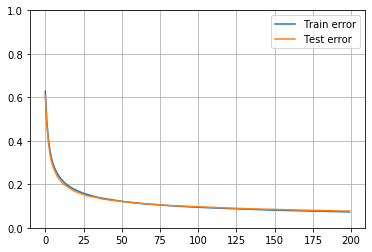

In [11]:
plot.ylim(0, 1)
plot.grid()
plot.plot(tab_acc_train, label="Train error")
plot.plot(tab_acc_test, label="Test error")
plot.legend(loc="upper right")
plot.show() 

Affiche le résultat obten pour chaque image test du batch.

In [ ]:
np.set_printoptions(formatter={'float': '{:0.3f}'.format})
for image in range(taille_batch):
        print("image", image)
        print("sortie du réseau:", resulat[image], np.argmax(resulat[image]))
        print("sortie attendue :", mnist_test_labels[image], np.argmax(mnist_test_labels[image]))
        cv2.imshow('image', mnist_test_images[image].reshape(28, 28))
        if cv2.waitKey()&0xFF==ord('q'):
            break

image 0
sortie du réseau: [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.999 0.000 0.001] 7
sortie attendue : [0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000] 7
